In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [2]:
import pandas_datareader.data as web
import datetime

In [3]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [4]:
#we are using the panda datareader with stooq api to get the stock data
#that we need for open close stock interface structure

BAC = web.DataReader("BAC",'stooq',start,end)
# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)



In [5]:
#now we create tickers(Representative symbols) to represent in our new whole dataframe
#WITH our key arguments == tickers list
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS','WFC']

In [6]:
bank_stocks = pd.concat([BAC, C,GS,JPM,MS,WFC],axis = 1,keys = tickers)#rmb axis = 1 is for along column
bank_stocks.head()

BAC                                                 C  \
               Open     High      Low    Close        Volume     Open   
Date                                                                    
2006-01-03  39.7180  39.9344  39.0661  39.8533  1.925141e+07  410.185   
2006-01-04  39.7862  39.9916  39.3189  39.4296  2.097767e+07  409.037   
2006-01-05  39.4296  39.6430  39.2113  39.4820  1.751074e+07  405.482   
2006-01-06  39.6153  39.7082  39.2370  39.4208  1.487831e+07  409.185   
2006-01-09  39.5481  39.7605  39.2439  39.4474  1.845131e+07  406.828   

                                                     ...       MS           \
               High      Low    Close        Volume  ...     Open     High   
Date                                                 ...                     
2006-01-03  413.344  402.719  412.611  1.836840e+06  ...  37.8570  38.7278   
2006-01-04  411.027  404.719  404.987  2.235056e+06  ...  38.8704  39.2548   
2006-01-05  408.334  405.155  406.977  1.356199e+06  ...  38.6386  38.7991   
2006-01-06  409.324  403.481  406.977  1.636869e+06  ...  38.9170  38.9665   
2006-01-09  407.997  404.303  405.066  2.007837e+06  ...  38.8199  39.2617   

                                                WFC                    \
                Low    Close        Volume     Open     High      Low   
Date                                                                    
2006-01-03  37.5668  38.6069  6.741014e+06  22.8895  23.1626  22.6005   
2006-01-04  38.6386  38.6386  1.000157e+07  23.0305  23.0454  22.7137   
2006-01-05  38.4138  38.7436  7.243742e+06  22.8150  22.8517  22.6759   
2006-01-06  38.4395  38.7833  8.637572e+06  22.8766  23.0116  22.7375   
2006-01-09  38.8140  39.1884  5.195856e+06  22.9451  23.0454  22.8517   

                                   
              Close        Volume  
Date                               
2006-01-03  23.1060  1.520929e+07  
2006-01-04  22.8378  1.500717e+07  
2006-01-05  22.8150  1.398718e+07  
2006-01-06  22.9451  1.160232e+07  
2006-01-09  22.9451  7.758446e+06  

[5 rows x 30 columns]

In [12]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.7180  39.9344  39.0661  39.8533  1.925141e+07  410.185   
2006-01-04   39.7862  39.9916  39.3189  39.4296  2.097767e+07  409.037   
2006-01-05   39.4296  39.6430  39.2113  39.4820  1.751074e+07  405.482   
2006-01-06   39.6153  39.7082  39.2370  39.4208  1.487831e+07  409.185   
2006-01-09   39.5481  39.7605  39.2439  39.4474  1.845131e+07  406.828   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   413.344  402.719  412.611  1.836840e+06  ...  37.8570  38.7278   
2006-01-04   411.027  404.719  404.987  2.235056e+06  ...  38.8704  39.2548   
2006-01-05   408.334  405.155  406.977  1.356199e+06  ...  38.6386  38.7991   
2006-01-06   409.324  403.481  406.977  1.636869e+06  ...  38.9170  38.9665   
2006-01-09   407.997  404.303  405.066  2.007837e+06  ...  38.8199  39.2617   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.5668  38.6069  6.741014e+06  22.8895  23.1626  22.6005   
2006-01-04   38.6386  38.6386  1.000157e+07  23.0305  23.0454  22.7137   
2006-01-05   38.4138  38.7436  7.243742e+06  22.8150  22.8517  22.6759   
2006-01-06   38.4395  38.7833  8.637572e+06  22.8766  23.0116  22.7375   
2006-01-09   38.8140  39.1884  5.195856e+06  22.9451  23.0454  22.8517   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   23.1060  1.520929e+07  
2006-01-04   22.8378  1.500717e+07  
2006-01-05   22.8150  1.398718e+07  
2006-01-06   22.9451  1.160232e+07  
2006-01-09   22.9451  7.758446e+06  

[5 rows x 30 columns]

In [13]:
bank_stocks.xs(key='Close',axis = 1, level = "Stock Info").max()
#so short cut to get run through the elements in column 'Close' to get each stock max price

Bank Ticker
BAC     46.4714
C      472.2140
GS     205.0270
JPM     57.6748
MS      59.1303
WFC     47.3958
dtype: float64

In [14]:
returns = pd.DataFrame()
for tick in tickers:
    #this is how you can concate and create new columns with the main labels with new data 
    #with the method as rmb
    returns[tick+ 'Return'] = bank_stocks[tick]['Close'].pct_change()

In [15]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010631,-0.018477,-0.013699,-0.014308,0.000821,-0.011607
2006-01-05,0.001329,0.004914,-0.000362,0.003130,0.002717,-0.000998
2006-01-06,-0.001550,0.000000,0.013989,0.007064,0.001025,0.005702
2006-01-09,0.000675,-0.004696,0.012032,0.016240,0.010445,0.000000


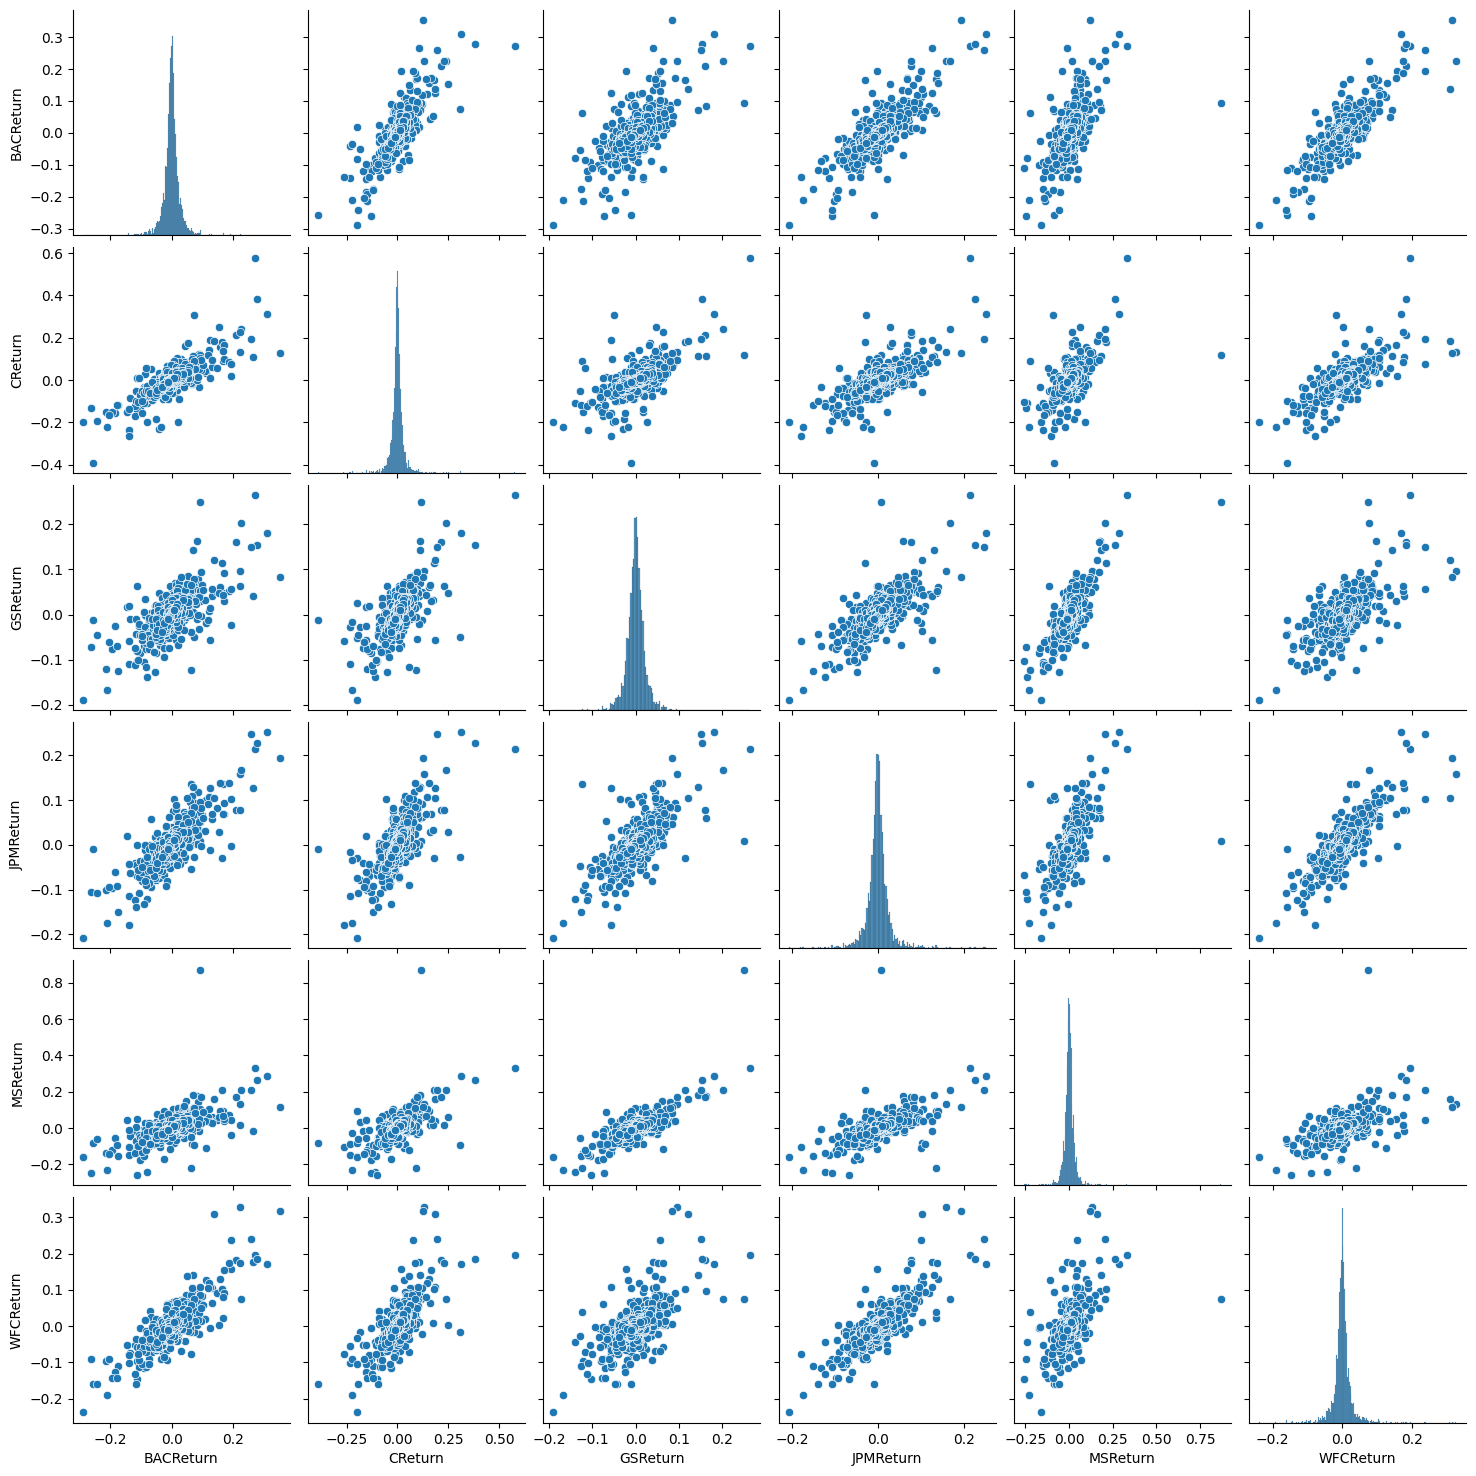

In [16]:
#now we can see which stock stands out, to further do data exploration
sns.pairplot(returns[1:])

In [21]:
#since I had made the returns dataframe, I would want to see the minimum returns for all the stocks
#I noticed how BAC, GS,WFC has the same day with minimum return
returns.idxmin() 

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [33]:
returns.idxmax()
returns.head()
returns.keys()
#At the same time, we realised that JP Morgan has two dates which are just one day apart that has a huge difference
#One of the main factor could be because of Obama's inauguration Day that lead to crisis of confidence in US banks

Index(['BACReturn', 'CReturn', 'GSReturn', 'JPMReturn', 'MSReturn',
       'WFCReturn'],
      dtype='object')

In [36]:
start_date = '2015-01-01'
end_date = '2015-12-31'
#so all I had to do was use loc[ and it would get the subset of the column names] which is best used with datetime
returns.loc[start_date:end_date].std()
#Year2015 = (returns["Date"]>= start_date) & (returns["Date"]<= end_date)
#Year2015 = returns.loc[returns["Date"].between(start_date,end_date)]
#returns.loc[Year2015].std()

#IN THIS CASE, we can see that BAC has the biggest risk followed by MS. Essentially they are real close to each other

BACReturn    0.016149
CReturn      0.015280
GSReturn     0.014028
JPMReturn    0.013964
MSReturn     0.016006
WFCReturn    0.012545
dtype: float64

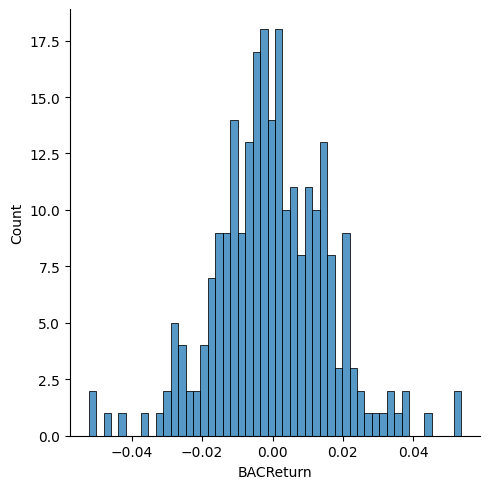

In [44]:
#so for Bank of America deviation of up to 0.02 (2015)
sns.displot(data = returns.loc[start_date:end_date]["BACReturn"],bins = 50)

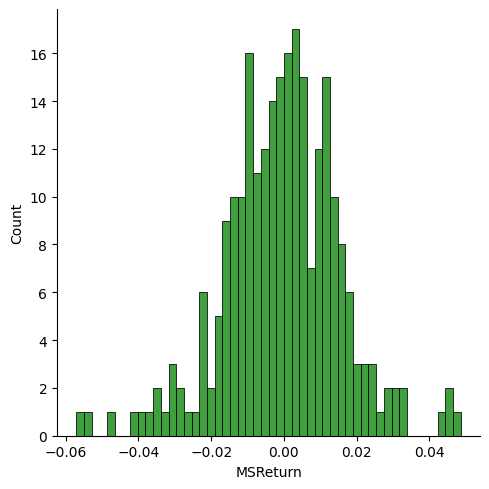

In [52]:
#for morgan stanley it has a bigger deivation of up to 0.06 (2015)
sns.displot(data = returns.loc[start_date:end_date]["MSReturn"],color = 'green',bins = 50)

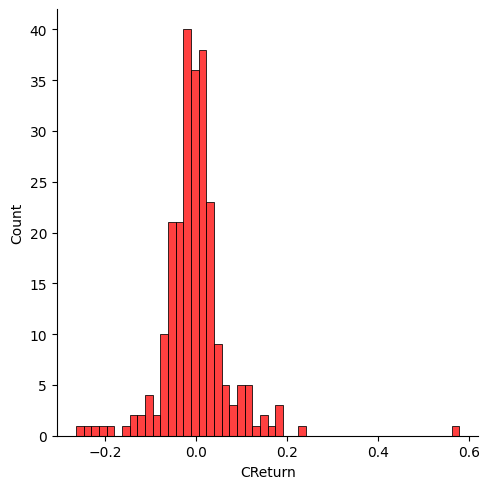

In [53]:
#when I went to check out from 2008 financial crisis for CitiGroup, it has a huge standard deviation in the year 2008
#to more data exploration and reasoning
sns.displot(returns.loc['2008-01-01':'2008-12-12']["CReturn"], color = 'red', bins = 50)